In [13]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pycountry
import matplotlib.dates as mdates

## Number of Repositories Created in Each Year


In [4]:
# Read data
repository_df = pd.read_csv("../data/repository_details.csv")

In [5]:
# Extract year from dates
repository_df["Created Date"] = pd.to_datetime(repository_df["Created Date"])
repository_df["Year"] = repository_df["Created Date"].dt.year

# Group by Year and Count
repositories_per_year = repository_df.groupby("Year").size()

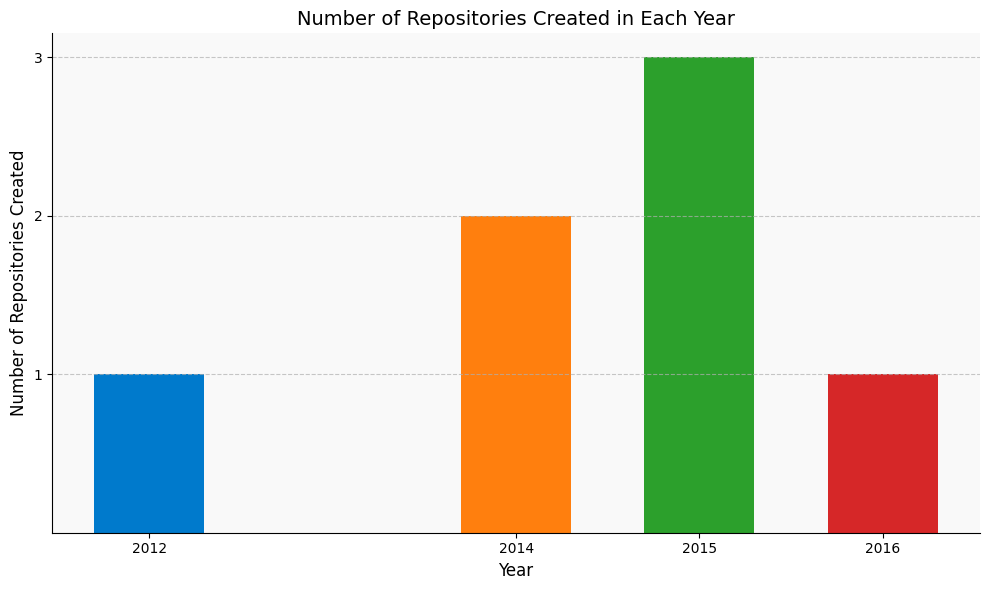

In [6]:
# Visualize the data 
plt.figure(figsize=(10, 6))  # Adjust the figure size

# Custom color scheme for bars
bar_colors = ['#007ACC', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B']

# Custom bar width and gap
bar_width = 0.6
bar_gap = 0.2

# Plot the bar chart
plt.bar(repositories_per_year.index, repositories_per_year.values, width=bar_width, color=bar_colors)

# Styling the chart
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Repositories Created", fontsize=12)
plt.title("Number of Repositories Created in Each Year", fontsize=14)

# Custom font for tick labels
plt.xticks(repositories_per_year.index, fontsize=10)
plt.yticks(range(int(repositories_per_year.values.min()), int(repositories_per_year.values.max()) + 1))

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Customize the background color
plt.gca().set_facecolor('#F9F9F9')

plt.tight_layout()  # Adjust spacing to prevent label overlap

# Save the plot as a PNG image
output_path = '../output/repository_per_year.png'  
plt.savefig(output_path,  dpi=400, bbox_inches='tight') 

plt.show()

## Number of GAP Contributors from Each Country

In [8]:
# Read data from CSV
file_path = "../data/user_location.csv"  # Replace with the actual file path
user_location_df = pd.read_csv(file_path)

# Group by country and calculate the count of users from each country
country_counts = user_location_df['Country'].value_counts()

# Create a DataFrame with country names and their corresponding counts
df_countries = pd.DataFrame({'Country': country_counts.index, 'User Count': country_counts.values})

# Load world shapefile data using geopandas
world = gpd.read_file('../resources/ne_110m_admin_0_countries.shp')  

# Merge the world shapefile data with the user count data
merged_data = world.merge(df_countries, left_on='ADMIN', right_on='Country', how='left')

<Figure size 2500x1500 with 0 Axes>

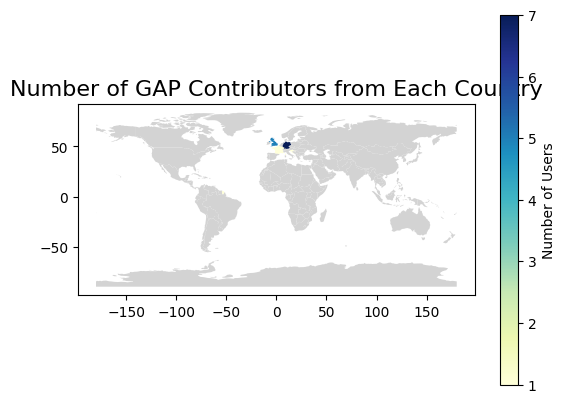

In [9]:
# Plot the choropleth map
plt.figure(figsize=(25, 15))  # Adjust the figure size if needed
merged_data.plot(column='User Count', cmap='YlGnBu', legend=True, legend_kwds={'label': 'Number of Users'}, missing_kwds={'color': 'lightgrey'})
plt.title('Number of GAP Contributors from Each Country', fontsize=16)

# Save the plot as a PNG image
output_path = '../output/contributor_distribution_map.png'  # Specify the path and file name for the output image
plt.savefig(output_path,  dpi=1800, bbox_inches='tight')  # Use dpi to control the image resolution

plt.show()

## Commits, Issues, and Pull Requests Over Time

In [10]:
# Step 1: Read data from CSV
repository_activity_file_path = "../data/repository_activity.csv"  # Replace with the actual file path
repository_activity_df = pd.read_csv(repository_activity_file_path)

# Group the DataFrame by month and calculate the sum of commits, issues, and pull requests per month
grouped_repository_activity_df = repository_activity_df.groupby('Month').sum()

# Extract the timeline (months) from the index and convert it to datetime
timeline = pd.to_datetime(grouped_repository_activity_df.index)

5

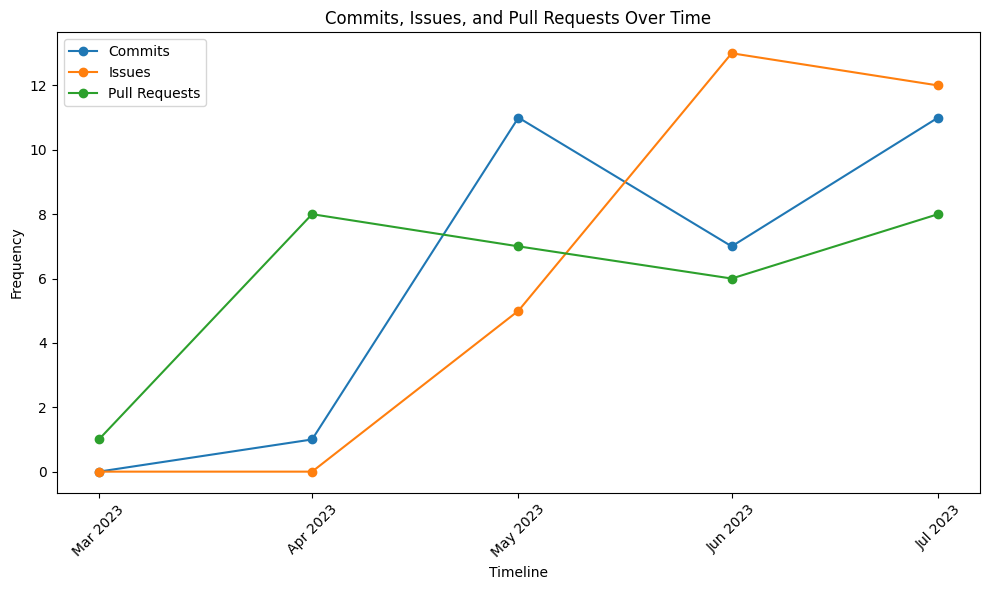

In [16]:
# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(timeline, grouped_repository_activity_df['Commits Per Month'], label='Commits', marker='o')
plt.plot(timeline, grouped_repository_activity_df['Issues Per Month'], label='Issues', marker='o')
plt.plot(timeline, grouped_repository_activity_df['Pull Requests Per Month'], label='Pull Requests', marker='o')

# Customize the chart
plt.xlabel('Timeline')
plt.ylabel('Frequency')
plt.title('Commits, Issues, and Pull Requests Over Time')
plt.legend()

date_format = mdates.DateFormatter('%b %Y')
plt.gca().xaxis.set_major_formatter(date_format)

# Set the locator to display only a subset of dates as ticks on the x-axis
locator = mdates.MonthLocator(interval=1)  # Display ticks every 1 month
plt.gca().xaxis.set_major_locator(locator)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()

# Save the plot as a PNG image
output_path = '../output/repository_activity.png'  
plt.savefig(output_path,  dpi=400, bbox_inches='tight')  

plt.show()

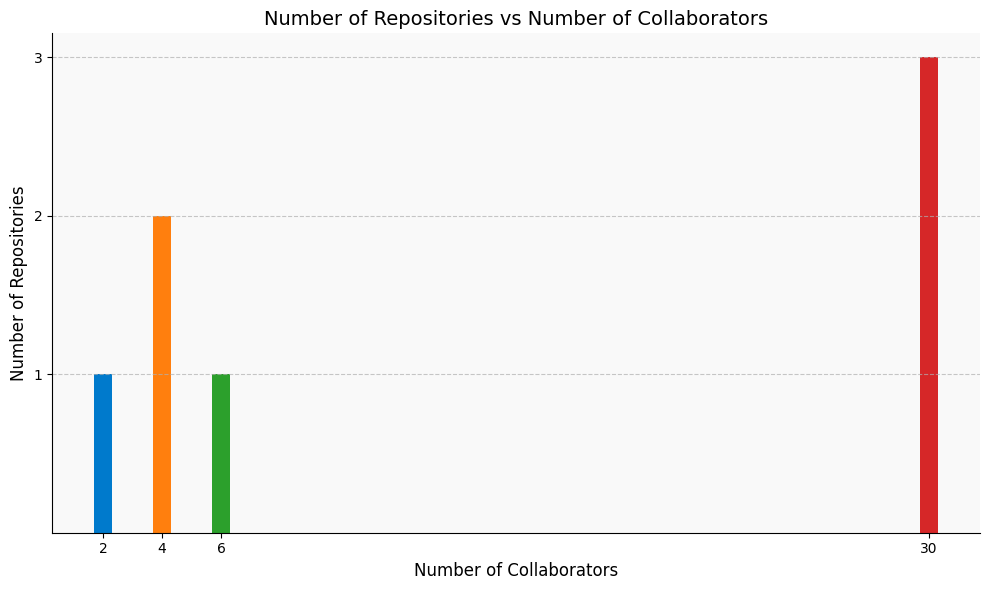

In [23]:
# Group by Year and Count
repositories_vs_contributors = repository_df.groupby("Number of Contributors").size()

# Step 5: Visualize the data with custom style
plt.figure(figsize=(10, 6))  

# Custom color scheme for bars
bar_colors = ['#007ACC', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B']

# Custom bar width and gap
bar_width = 0.6
bar_gap = 0.2

# Plot the bar chart
plt.bar(repositories_vs_contributors.index, repositories_vs_contributors.values, width=bar_width, color=bar_colors)

# Styling the chart
plt.xlabel("Number of Collaborators", fontsize=12)
plt.ylabel("Number of Repositories", fontsize=12)
plt.title("Number of Repositories vs Number of Collaborators", fontsize=14)

# Custom font for tick labels
plt.xticks(repositories_vs_contributors.index, fontsize=10)
plt.yticks(range(int(repositories_vs_contributors.values.min()), int(repositories_vs_contributors.values.max()) + 1))


# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Customize the background color
plt.gca().set_facecolor('#F9F9F9')

plt.tight_layout()  # Adjust spacing to prevent label overlap

# Save the plot as a PNG image
output_path = '../output/repository_vs_collaborators.png'  # Specify the path and file name for the output image
plt.savefig(output_path,  dpi=400, bbox_inches='tight')  # Use dpi to control the image resolution

plt.show()